In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.loading as loading

### get experiments to analyze

In [4]:
experiments_table = loading.get_filtered_ophys_experiment_table() 

In [5]:
# limit to experiments that have behavior model outputs (to predict strategy) and event detection

experiments_table = experiments_table[(experiments_table.model_outputs_available==True)&
                                      (experiments_table.has_events==True)]
print(len(experiments_table))

322


In [6]:
experiments_table.head()

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
958527474,954954402,953982960,1018028339,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_75,True,3
958527464,954954402,953982960,1018028342,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_150,True,3
958527471,954954402,953982960,1018028345,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_225,True,3
958527477,954954402,953982960,1018028348,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_300,True,3
958527479,954954402,953982960,1018028354,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISl_150,True,3


In [7]:
# get some experiment
aribtrary_index = 50
ophys_experiment_id = experiments_table.index.values[aribtrary_index]

In [8]:
# see what metadata is available
experiments_table.iloc[aribtrary_index]

ophys_session_id                                                     994137503
behavior_session_id                                                  994174745
container_id                                                         991913064
project_code                                              VisualBehaviorTask1B
container_workflow_state                                               holding
experiment_workflow_state                                               passed
session_name                                          20191213_491060_4ImagesA
session_type                                                  OPHYS_4_images_A
equipment_name                                                         CAM2P.3
date_of_acquisition                                 2019-12-13 16:43:20.000000
isi_experiment_id                                                    972064221
specimen_id                                                          962177507
sex                                                 

### get SDK dataset through VBA loading function

The <code>get_ophys_dataset</code> function in <code>data_access.loading</code> returns an AllenSDK session object for a single imaging plane.

In [9]:
# this function gets an SDK session object then does a bunch of reformatting to fix things
dataset = loading.get_ophys_dataset(ophys_experiment_id, include_invalid_rois=False)

In [10]:
# get traces 
dataset.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
993886641,994314818,"[0.16197838993683678, 0.16457093528327663, 0.1..."
993887302,994314829,"[0.11921226629252767, 0.14018226458426583, 0.0..."
993887408,994314831,"[0.09718272253277177, 0.10388580195641796, 0.0..."
993886697,994314832,"[0.09681519293945859, 0.13219729385473775, 0.0..."
993887401,994314833,"[0.21791118144473498, 0.16569621220840824, 0.0..."


In [11]:
# as an array if you prefer
dff_array = np.vstack(dataset.dff_traces.dff.values)
dff_array.shape

(237, 140296)

In [12]:
# get events 
dataset.events

getting L0 events


,events
cell_specimen_id,
993886631,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
993886634,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.07787400861796406,..."
993886641,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
993886651,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
993886654,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
994810850,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05019031..."
994810853,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
994810859,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [13]:
# as an array
dataset.events_array.shape

(237, 140296)

In [14]:
# ophys timestamps
dataset.ophys_timestamps

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


array([2.22034000e+00, 2.25265000e+00, 2.28495000e+00, ...,
       4.53540673e+03, 4.53543904e+03, 4.53547136e+03])

In [15]:
# basic stimulus information
dataset.stimulus_presentations.head(5)

,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
stimulus_presentations_id,,,,,,,,,,
0,0.25019,18002.0,0,im065,False,17987,307.444499,307.694689,False,0
1,0.25023,18047.0,0,im065,False,18032,308.195369,308.445599,False,0
2,0.25021,18092.0,0,im065,False,18077,308.945719,309.195929,False,0
3,0.25020,18137.0,0,im065,False,18122,309.696339,309.946539,False,0
4,0.25018,18182.0,0,im065,False,18167,310.446949,310.697129,False,0


In [16]:
dataset.stimulus_presentations.keys()

Index(['duration', 'end_frame', 'image_index', 'image_name', 'omitted',
       'start_frame', 'start_time', 'stop_time', 'change', 'epoch'],
      dtype='object')

In [17]:
# stimulus information with many extra columns including behavior model outputs (slower to load)
# This is what you want to use - see next step below
dataset.extended_stimulus_presentations.head(5)

,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch,...,in_bout,bias,omissions1,task0,timing1D,engagement_state,lick_on_next_flash,lick_rate_next_flash,lick_on_previous_flash,lick_rate_previous_flash
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,
0,0.25019,18002.0,0,im065,False,17987,307.444499,307.694689,False,0,...,0,-2.661675,1.854301,3.305929,0.542491,engaged,0.0,1.000000,NaN,NaN
1,0.25023,18047.0,0,im065,False,18032,308.195369,308.445599,False,0,...,0,-2.661942,1.854346,3.305940,0.542808,engaged,0.0,0.740741,1.0,1.333333
2,0.25021,18092.0,0,im065,False,18077,308.945719,309.195929,False,0,...,0,-2.662199,1.854390,3.305950,0.543114,engaged,0.0,0.583333,0.0,1.000000
3,0.25020,18137.0,0,im065,False,18122,309.696339,309.946539,False,0,...,0,-2.662449,1.854433,3.305960,0.543411,engaged,0.0,0.480000,0.0,0.740741
4,0.25018,18182.0,0,im065,False,18167,310.446949,310.697129,False,0,...,0,-2.662689,1.854474,3.305970,0.543698,engaged,0.0,0.407407,0.0,0.583333


In [18]:
dataset.extended_stimulus_presentations.keys()

Index(['duration', 'end_frame', 'image_index', 'image_name', 'omitted',
       'start_frame', 'start_time', 'stop_time', 'change', 'epoch',
       'mean_running_speed', 'licks', 'rewards', 'time_from_last_lick',
       'time_from_last_reward', 'time_from_last_change',
       'time_from_last_omission', 'flash_after_omitted', 'flash_after_change',
       'licked', 'lick_rate', 'rewarded', 'reward_rate', 'running_rate',
       'bout_rate', 'hit_bout', 'hit_fraction', 'high_lick', 'high_reward',
       'flash_metrics_epochs', 'flash_metrics_labels', 'in_bout', 'bias',
       'omissions1', 'task0', 'timing1D', 'engagement_state',
       'lick_on_next_flash', 'lick_rate_next_flash', 'lick_on_previous_flash',
       'lick_rate_previous_flash'],
      dtype='object')

### ResponseAnalysis class provides access to time aligned cell responses 

In [19]:
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

In [20]:
analysis = ResponseAnalysis(dataset, 
                            use_events=True, 
                            use_extended_stimulus_presentations=True) # this gives you the model weight columns

### Get cell traces for all stimulus presentations 

In [21]:
# this creates a dataframe with the response of every cell for every stimulus presentation
# cell response is a snippet of the trace in a [-.5, 0.75] second window around stim onset

stim_response_df = analysis.get_response_df(df_name='stimulus_response_df')

# if you set use_events and use_extended_stimulus_presentations to True when initializing the class above, 
# that is what will be used to create this dataframe
# i.e. the 'trace' column will be either dF/F or event magnitude 
# and you will either have extra columns for behavior model output or not

getting L0 events


C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
stim_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,...,in_bout,bias,omissions1,task0,timing1D,engagement_state,lick_on_next_flash,lick_rate_next_flash,lick_on_previous_flash,lick_rate_previous_flash
0,0,993886641,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.48468416764674427, -0.452371889803628, -0....",0.003297,0.000000,0.0058,0.0000,0.0791,0.25019,...,0,-2.661675,1.854301,3.305929,0.542491,engaged,0.0,1.0,NaN,NaN
1,0,993887302,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.48468416764674427, -0.452371889803628, -0....",0.003472,0.000000,0.0265,0.0042,0.0867,0.25019,...,0,-2.661675,1.854301,3.305929,0.542491,engaged,0.0,1.0,NaN,NaN
2,0,993887408,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.48468416764674427, -0.452371889803628, -0....",0.000820,0.003630,0.0457,0.0230,0.0922,0.25019,...,0,-2.661675,1.854301,3.305929,0.542491,engaged,0.0,1.0,NaN,NaN
3,0,993886697,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.48468416764674427, -0.452371889803628, -0....",0.002341,0.004393,0.0415,0.0000,0.0749,0.25019,...,0,-2.661675,1.854301,3.305929,0.542491,engaged,0.0,1.0,NaN,NaN
4,0,993887401,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.48468416764674427, -0.452371889803628, -0....",0.003977,0.000000,0.0096,0.0000,0.0275,0.25019,...,0,-2.661675,1.854301,3.305929,0.542491,engaged,0.0,1.0,NaN,NaN


In [23]:
stim_response_df.keys() 

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'p_value_omission', 'p_value_stimulus',
       'duration', 'end_frame', 'image_index', 'image_name', 'omitted',
       'start_frame', 'start_time', 'stop_time', 'change', 'epoch',
       'mean_running_speed', 'licks', 'rewards', 'time_from_last_lick',
       'time_from_last_reward', 'time_from_last_change',
       'time_from_last_omission', 'flash_after_omitted', 'flash_after_change',
       'licked', 'lick_rate', 'rewarded', 'reward_rate', 'running_rate',
       'bout_rate', 'hit_bout', 'hit_fraction', 'high_lick', 'high_reward',
       'flash_metrics_epochs', 'flash_metrics_labels', 'in_bout', 'bias',
       'omissions1', 'task0', 'timing1D', 'engagement_state',
       'lick_on_next_flash', 'lick_rate_next_flash', 'lick_on_previous_flash',
       'lick_rate_previous_flash'],
      dtype='object')

### what stuff to predict? 

#### continuous variables - model weights

In [24]:
ep = dataset.extended_stimulus_presentations.copy()

Text(0.5, 1.0, 'task weight over the session')

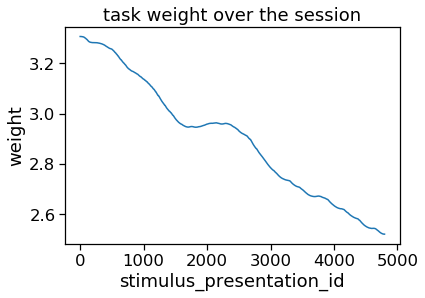

In [25]:
# task weight
plt.plot(ep.task0.values)
plt.xlabel('stimulus_presentation_id')
plt.ylabel('weight')
plt.title('task weight over the session')

Text(0.5, 1.0, 'timing weight over the session')

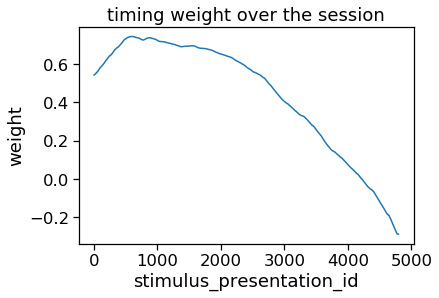

In [26]:
# timing weight
plt.plot(ep.timing1D.values)
plt.xlabel('stimulus_presentation_id')
plt.ylabel('weight')
plt.title('timing weight over the session')

#### population vector & timing weight for some trial

In [27]:
trial_data = stim_response_df[stim_response_df.stimulus_presentations_id==5]
trial_data.head(2)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,...,in_bout,bias,omissions1,task0,timing1D,engagement_state,lick_on_next_flash,lick_rate_next_flash,lick_on_previous_flash,lick_rate_previous_flash
1185,5,993886641,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.48468416764674427, -0.452371889803628, -0....",0.000000,0.0,1.0000,1.0,1.0000,0.25019,...,0,-2.662918,1.854514,3.305979,0.543981,engaged,0.0,0.353741,0.0,0.48
1186,5,993887302,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.48468416764674427, -0.452371889803628, -0....",0.005035,0.0,0.0016,0.0,0.0298,0.25019,...,0,-2.662918,1.854514,3.305979,0.543981,engaged,0.0,0.353741,0.0,0.48


Text(0, 0.5, 'mean event magnitude')

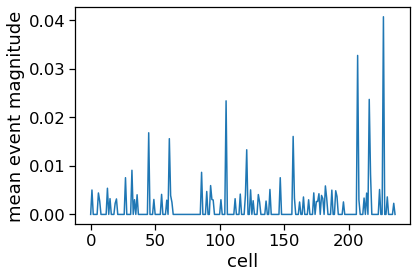

In [28]:
population_responses = trial_data.mean_response.values
plt.plot(population_responses)
plt.xlabel('cell')
plt.ylabel('mean event magnitude')

In [29]:
# all values for this stimulus_presentation should be the same, so just take the first one
model_weight = trial_data.timing1D.values[0]
model_weight

0.5439808034819147

#### hit fraction - a measure of 'engagement' - the fraction of flashes that are hit trials with licks 

In [30]:
# at least i believe thats the definition, need to check with Alex to be sure

Text(0, 0.5, 'hit_fraction')

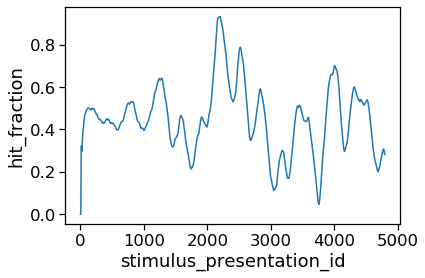

In [31]:
plt.plot(ep.hit_fraction.values)
plt.xlabel('stimulus_presentation_id')
plt.ylabel('hit_fraction')

In [32]:
# for the selected trial
trial_data.hit_fraction.values[0]

0.0

#### could also use lick rate or reward rate


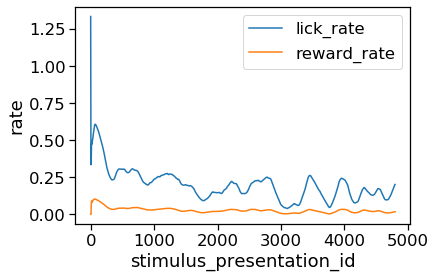

In [33]:
plt.plot(ep.lick_rate.values)
plt.xlabel('stimulus_presentation_id')
plt.ylabel('rate')

plt.plot(ep.reward_rate.values)
plt.xlabel('stimulus_presentation_id')

plt.legend(['lick_rate', 'reward_rate'])

#### categorical version of engagement 

In [34]:
# get session level measure of task vs timing strategy
ep.flash_metrics_labels

stimulus_presentations_id
0       high-lick,low-reward
1       high-lick,low-reward
2       high-lick,low-reward
3       high-lick,low-reward
4       high-lick,low-reward
                ...         
4793     low-lick,low-reward
4794     low-lick,low-reward
4795     low-lick,low-reward
4796     low-lick,low-reward
4797     low-lick,low-reward
Name: flash_metrics_labels, Length: 4798, dtype: object

### session level metrics

In [35]:
# get session level metrics for model output
model_summary = loading.get_behavior_model_summary_table()

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [36]:
# get it for this session
# need to go from experiment_id (single plane) to session_id (behavior for all planes in a session)
ophys_session_id = experiments_table.loc[ophys_experiment_id].ophys_session_id
session_metrics = model_summary[model_summary.ophys_session_id==ophys_session_id]
session_metrics.keys()

Index(['active', 'age_in_days', 'avg_weight_bias', 'avg_weight_bias_1st',
       'avg_weight_bias_2nd', 'avg_weight_omissions1',
       'avg_weight_omissions1_1st', 'avg_weight_omissions1_2nd',
       'avg_weight_task0', 'avg_weight_task0_1st', 'avg_weight_task0_2nd',
       'avg_weight_timing1D', 'avg_weight_timing1D_1st',
       'avg_weight_timing1D_2nd', 'behavior_session_id', 'container_id',
       'container_in_order', 'cre_line', 'date_of_acquisition', 'donor_id',
       'driver_line', 'equipment_name', 'full_container', 'full_genotype',
       'good', 'image_set', 'imaging_depth', 'lick_fraction',
       'lick_fraction_1st', 'lick_fraction_2nd', 'lick_hit_fraction',
       'lick_hit_fraction_1st', 'lick_hit_fraction_2nd', 'meso', 'num_aborts',
       'num_cr', 'num_fa', 'num_hits', 'num_miss', 'ophys_experiment_id',
       'ophys_session_id', 'prior_bias', 'prior_omissions1', 'prior_task0',
       'prior_timing1D', 'project_code', 'reporter_line', 'session_roc',
       'session_

In [37]:
# get session level measure of task vs timing strategy
session_metrics.task_dropout_index

16    20.966378
Name: task_dropout_index, dtype: float64